In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
drivers = pd.read_csv('../data/drivers.csv')
driver_standings = pd.read_csv('../data/driver_standings.csv')
races = pd.read_csv('../data/races.csv')



In [4]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [6]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [5]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [7]:
# check for nun values
drivers.isnull().sum()

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [8]:
# check for nun values
driver_standings.isnull().sum()

driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

In [9]:
# check for nun values races
races.isnull().sum()

raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

In [10]:
# Check for the presence of \N values in the dataframe
null_values = drivers.isnull().sum() + drivers.eq('\\N').sum()

# Get the names of columns with \N values
null_cols = null_values[null_values > 0].index.tolist()

if len(null_cols) == 0:
    print("There are no columns with \\N values in the drivers dataframe.")
else:
    print("The following columns contain \\N values:")
    print(null_cols)


The following columns contain \N values:
['number', 'code']


In [11]:
# Check for the presence of \N values in the dataframe
null_values = driver_standings.isnull().sum() + driver_standings.eq('\\N').sum()

# Get the names of columns with \N values
null_cols = null_values[null_values > 0].index.tolist()

if len(null_cols) == 0:
    print("There are no columns with \\N values in the drivers dataframe.")
else:
    print("The following columns contain \\N values:")
    print(null_cols)

There are no columns with \N values in the drivers dataframe.


In [12]:
# Check for the presence of \N values in the dataframe
null_values = races.isnull().sum() + races.eq('\\N').sum()

# Get the names of columns with \N values
null_cols = null_values[null_values > 0].index.tolist()

if len(null_cols) == 0:
    print("There are no columns with \\N values in the drivers dataframe.")
else:
    print("The following columns contain \\N values:")
    print(null_cols)

The following columns contain \N values:
['time', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']


In [13]:
# Join the datasets on the driverId column
merged_data = pd.merge(drivers, driver_standings, on='driverId')
merged_merged_data = pd.merge(merged_data, races, on='raceId')
merged_merged_data.head()

# how many years in F1 for each driver
f1_seasons_for_each_driver = merged_merged_data.groupby('driverRef')['year'].nunique().reset_index()
f1_seasons_for_each_driver.head()
# f1_seasons_for_each_driver['year'].unique()

# f1_seasons_for_each_driver[f1_seasons_for_each_driver['driverRef'] == 'alonso']

,driverRef,year
0,Cannoc,1
1,Changy,1
2,abate,2
3,abecassis,2
4,acheson,2


In [14]:
avg_points_per_season = merged_data.groupby('driverRef')['points'].mean().reset_index()
avg_points_per_season
avg_points_per_season[avg_points_per_season['driverRef'] == 'hamilton']

,driverRef,points
339,hamilton,146.663987


In [15]:
final_merged_data = pd.merge(f1_seasons_for_each_driver, avg_points_per_season, on='driverRef')
final_merged_data 


,driverRef,year,points
0,Cannoc,1,0.000000
1,Changy,1,0.000000
2,abate,2,0.000000
3,abecassis,2,0.000000
4,acheson,2,0.000000
...,...,...,...
845,zapico,1,0.000000
846,zhou,2,3.695652
847,zonta,5,0.452830
848,zorzi,3,0.457143


In [17]:
plott = final_merged_data.groupby('year')['points'].mean().reset_index()
plott['year'] = plott['year'].astype(float)
plott['points']= plott['points'].astype(float)

# round up the points by 2 decimal places
plott['points'] = plott['points'].round(1)
plott

,year,points
0,1.0,0.1
1,2.0,0.6
2,3.0,1.0
3,4.0,1.7
4,5.0,3.6
5,6.0,5.7
6,7.0,7.4
7,8.0,3.5
8,9.0,16.7
9,10.0,7.8


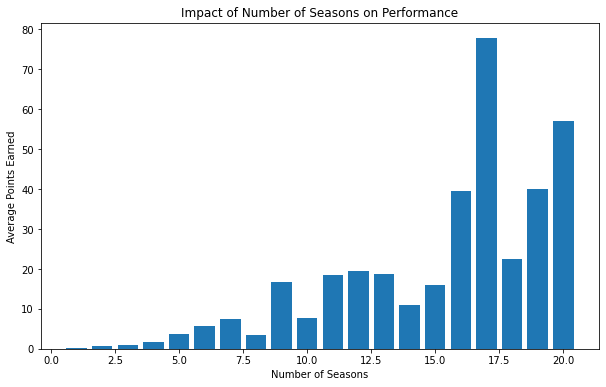

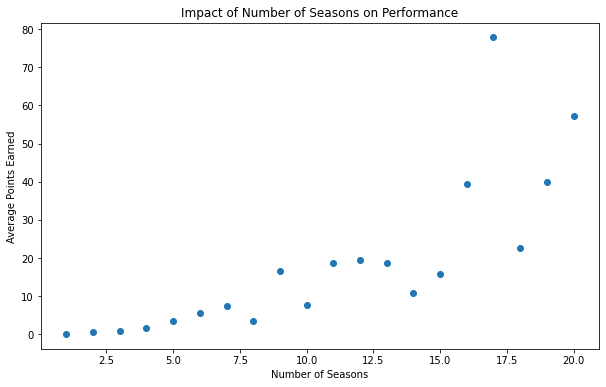

In [18]:
#plot a barplot of dataframe above
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x='year', height='points', data=plott)
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Average Points Earned')
ax.set_title('Impact of Number of Seasons on Performance')
plt.show()

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(plott['year'], plott['points'])
# ax.set_xlabel('Number of Seasons')
# ax.set_ylabel('Average Points Earned')
# ax.set_title('Impact of Number of Seasons on Performance')
# plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x='year', y='points', data=plott)
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Average Points Earned')
ax.set_title('Impact of Number of Seasons on Performance')
plt.show()



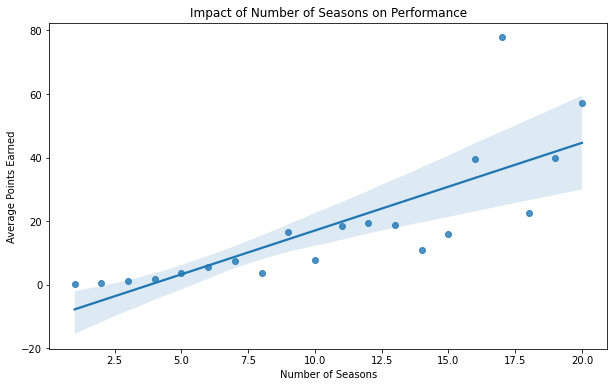

In [19]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='year', y='points', data=plott, ax=ax)
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Average Points Earned')
ax.set_title('Impact of Number of Seasons on Performance')
plt.show()


In [20]:
# export this dataframe to a csv file without the index
plott.to_csv('q2.csv', index=False)

By calculating each driver's average points earned per season and grouping the data by the number of seasons participated, you can analyze the relationship between a driver's experience and their performance in Formula 1.

By calculating the average points earned per season for each group of drivers with a given number of seasons of experience, you can visualize how drivers' performances change as they gain more experience. This can help answer the question of how driver experience impacts performance in Formula 1.